In [30]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_distribution
from qiskit_aer import AerSimulator

In [31]:
#Quantum Registers:
input0 = QuantumRegister(1, "input0") #a
input1 = QuantumRegister(1, "input1") #b
zero   = QuantumRegister(1,"zero") #|0>

In [32]:
#Classical Registers:
measure0 = ClassicalRegister(1, "measure0")
measure1 = ClassicalRegister(1, "measure1")
input_c  = ClassicalRegister(1, 'input_c')

In [33]:
#Circuit:
qc = QuantumCircuit(input0, input1, zero, measure0, measure1, input_c)

In [34]:
qc.h(input0)
qc.h(input1)

In [35]:
#Barrier:
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "input0"), index=0>, <Qubit register=(1, "input1"), index=0>, <Qubit register=(1, "zero"), index=0>), clbits=())

In [36]:
qc.measure(input0,input_c)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "input0"), index=0>, <Qubit register=(1, "input1"), index=0>, <Qubit register=(1, "zero"), index=0>), clbits=())

In [37]:
#Half Adder Logic
qc.ccx(input0, input1,zero) # a AND b
qc.cx(input0, input1) # a XOR b

qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "input0"), index=0>, <Qubit register=(1, "input1"), index=0>, <Qubit register=(1, "zero"), index=0>), clbits=())

In [38]:
qc.measure(input1,measure0) #sum
qc.measure(zero, measure1) #carry

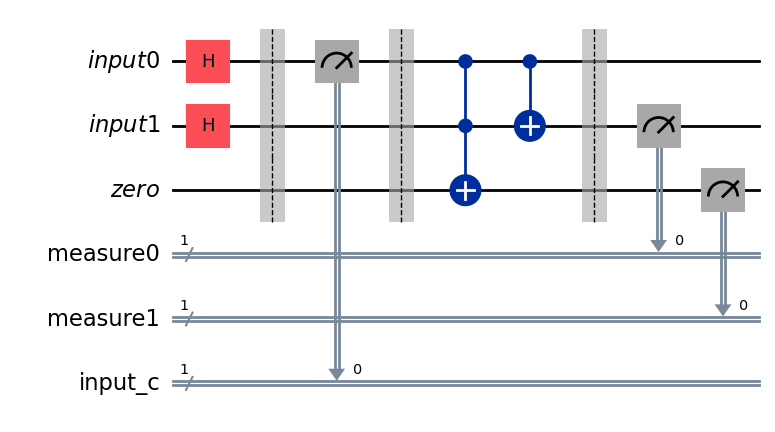

In [39]:
qc.draw(output="mpl")

In [40]:
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts(0)

counts

{'0 0 1': 262, '1 0 1': 244, '0 0 0': 269, '1 1 0': 249}

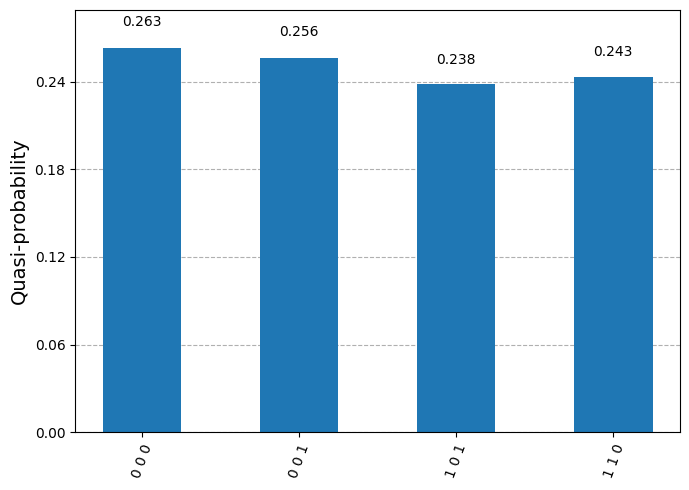

In [41]:
plot_distribution(counts)